<a href="https://colab.research.google.com/github/Fidel-Leanne/feature-branch/blob/master/Group_2_Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
#import pandas as pd
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
pip list

Package                       Version
----------------------------- ----------------------------
absl-py                       1.2.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.4
Babel                         2.10.3
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.8

In [ ]:
import tensorflow as tf

import os

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/Training/Training' 

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Training/Training')

Found 17580 files belonging to 6 classes.


In [ ]:

class_names = data.class_names
print(class_names)

['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']


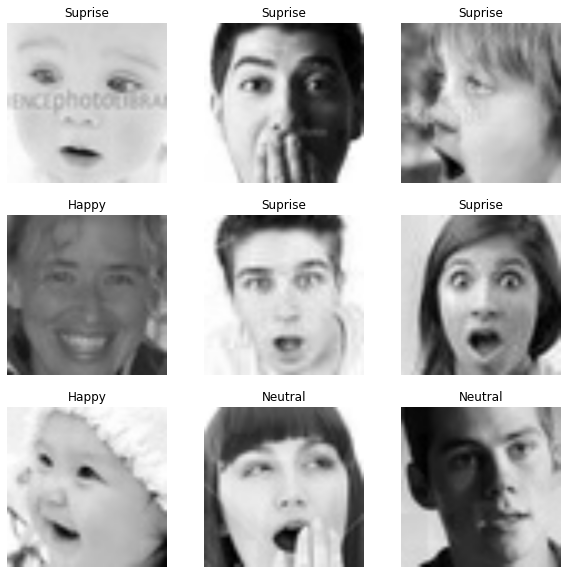

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

SCALING DATA

In [ ]:
#data = data.map(lambda x,y: (x/255, y))

In [ ]:
#data.as_numpy_iterator().next()

In [ ]:
batch_size = 32
img_height = 48
img_width = 48

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Training/Training',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17580 files belonging to 6 classes.
Using 14064 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/drive/MyDrive/Training/Training',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 17580 files belonging to 6 classes.
Using 3516 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Suprise']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 48, 48, 3)
(32,)


CONFIGURING THE DATASET FOR PERFORMANCE 

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

STANDARDIZING THE STUDENT

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.003921569 1.0


CFEATING KERAS MODEL

In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

COMPILING THE MODEL

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MODEL SUMMARY

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        1

TRAINING THE MODEL

In [ ]:
epochs=45
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/45
440/440 [==============================] - 50s 111ms/step - loss: 1.1816 - accuracy: 0.4644 - val_loss: 1.0492 - val_accuracy: 0.5498
Epoch 2/45
440/440 [==============================] - 39s 88ms/step - loss: 0.9683 - accuracy: 0.5947 - val_loss: 0.9336 - val_accuracy: 0.5939
Epoch 3/45
440/440 [==============================] - 43s 98ms/step - loss: 0.8455 - accuracy: 0.6497 - val_loss: 0.8546 - val_accuracy: 0.6271
Epoch 4/45
440/440 [==============================] - 41s 93ms/step - loss: 0.7698 - accuracy: 0.6779 - val_loss: 0.8270 - val_accuracy: 0.6442
Epoch 5/45
440/440 [==============================] - 41s 93ms/step - loss: 0.7020 - accuracy: 0.7127 - val_loss: 0.8380 - val_accuracy: 0.6419
Epoch 6/45
440/440 [==============================] - 41s 93ms/step - loss: 0.6358 - accuracy: 0.7435 - val_loss: 0.8173 - val_accuracy: 0.6633
Epoch 7/45
440/440 [==============================] - 39s 88ms/step - loss: 0.5643 - accuracy: 0.7768 - val_loss: 0.8387 - val_accuracy

VISUALIZING TRAINING RESULTS

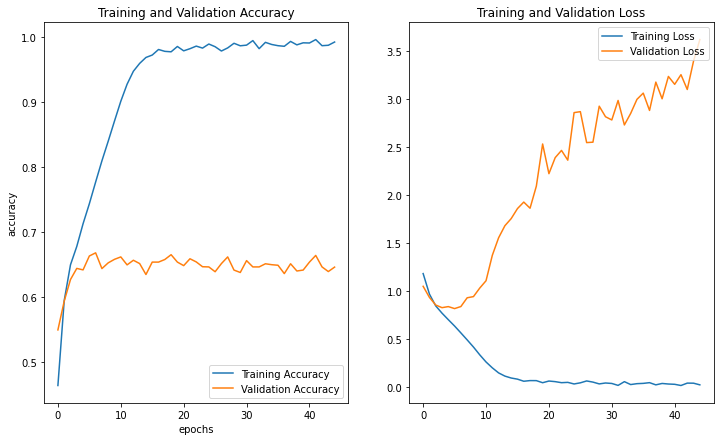

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epochs')
#plt.legend(['train', 'val'], loc='upper left')
#plt.show()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#import keras
#from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
#plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
#plt.show()

AUGUMENTING DATA FOR OVERFITTING

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

VISUALIZING THE AUGUMENTED IMAGE

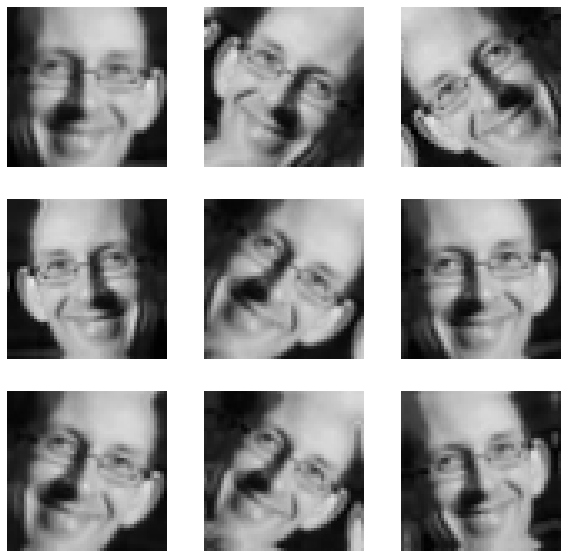

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

ADDING THE AUGUMENTED DATA TO THE MODEL BEFORE RETRAINING IT

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

COMPILING AND RETRAINING THE MODEL

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 48, 48, 3)         0         
                                                                 
 rescaling_2 (Rescaling)     (None, 48, 48, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                  

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
440/440 [==============================] - 50s 111ms/step - loss: 1.3225 - accuracy: 0.3492 - val_loss: 1.2118 - val_accuracy: 0.4454
Epoch 2/50
440/440 [==============================] - 46s 106ms/step - loss: 1.2103 - accuracy: 0.4462 - val_loss: 1.1161 - val_accuracy: 0.5151
Epoch 3/50
440/440 [==============================] - 58s 131ms/step - loss: 1.1149 - accuracy: 0.5051 - val_loss: 1.0552 - val_accuracy: 0.5404
Epoch 4/50
440/440 [==============================] - 50s 114ms/step - loss: 1.0569 - accuracy: 0.5395 - val_loss: 0.9891 - val_accuracy: 0.5722
Epoch 5/50
440/440 [==============================] - 45s 102ms/step - loss: 1.0069 - accuracy: 0.5604 - val_loss: 0.9249 - val_accuracy: 0.6084
Epoch 6/50
440/440 [==============================] - 63s 144ms/step - loss: 0.9736 - accuracy: 0.5759 - val_loss: 0.9048 - val_accuracy: 0.6186
Epoch 7/50
440/440 [==============================] - 66s 150ms/step - loss: 0.9394 - accuracy: 0.5985 - val_loss: 0.8882 - val_ac

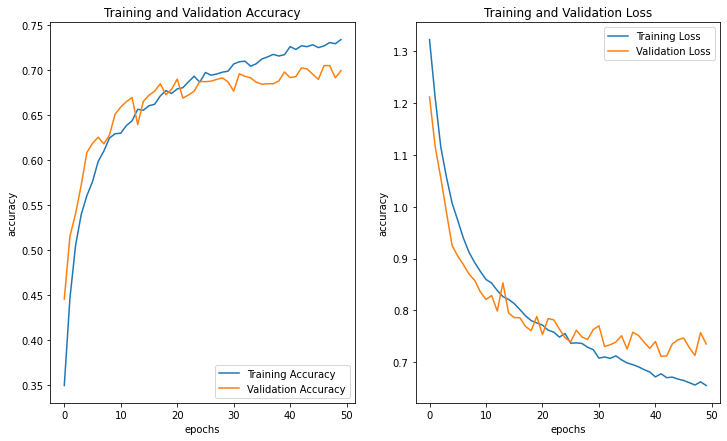

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.ylabel('accuracy')
plt.xlabel('epochs')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.show()

PREDICTING ON NEW DATA

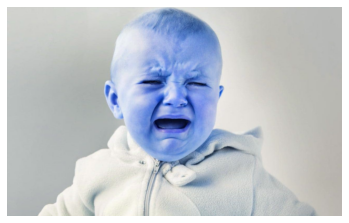

This person is most likely Sad with a 33.66 percent confidence.


In [ ]:
data_1 = '/content/Baby.jpeg'
data_path = tf.keras.utils.get_file('/content/Baby.jpeg', origin=data_1)

img = tf.keras.utils.load_img(
    data_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

img = cv2.imread('/content/Baby.jpeg')
plt.imshow(img)
plt.axis("off")
plt.show()

print(
    "This person is most likely {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


CONVERT KERAS SEQUENTIAL MODEL TO A TENSORFLOW LITE MODEL


In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [ ]:
interpreter.get_signature_list()

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [ ]:
predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

assert np.allclose(predictions, predictions_lite)

print(
    "This person is most likely {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

LOADING DATA

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
#import PIL
#import glob

In [ ]:
Testing = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Testing/Testing')

In [ ]:
Training = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Training/Training')

SCALING DATA - TURNING INTO GRAY SCALE

In [ ]:
#data = data.map(lambda x,y: (x/255, y))
#data.as_numpy_iterator().next()

SPLITTING DATA

In [ ]:
#train_size = int(len(data)*.7)
#val_size = int(len(data)*.2)
#test_size = int(len(data)*.1)

#train_size


In [ ]:
#train = data.take(train_size)
#val = data.skip(train_size).take(val_size)
#test = data.skip(train_size+val_size).take(test_size)

LOADING DATA USING KERAS UTILITY AND CREATING A DATA SET

In [ ]:
batch_size = 32
img_height = 48
img_width = 48

In [ ]:
  test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir1,
  #subset="testing",
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
  #TEST THIS TOO
  train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir2,
  #subset="testing",
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
#Replace test with train
class_names = train_ds.class_names
print(class_names)

VISUALIZE DATA

In [ ]:
import matplotlib.pyplot as plt

#REPLACE TEST WITH TRAIN
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#CHANGE TEST TO TRAIN
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

CONFIGURE THE DATASET FOR PERFORMANCE

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#train_size = int(len(data_dir2)*.8)
#val_size = int(len(data)*.2)
#test_size = int(len(data_dir1)*.2)

In [ ]:
#train_size

In [ ]:
#test_size

STANDARDAZING THE DATA

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

CREATING THE MODEL

In [ ]:
from tensorflow.keras.models import Sequential
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

COMPILING THE MODEL

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

MODEL SUMMARY

In [ ]:

model.summary()


TRAINING THE MODEL

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

VISUALIZING TRAINING RESULTS

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

DATA AUGUMENTATION

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

ADDING AUGUMENTED DATA TO THE MODEL

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

COMPILING AND RETRAINING THE MODEL

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=epochs
)

VISUALISING TRAINING RESULTS

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training Testing Loss')
plt.show()

PREDICTING NEW DATA AS THE OLD ONE IS OVER FITTED

In [ ]:
data_dir3 = '/content/FACE1.jpg'
data_dir3_path = tf.keras.utils.get_file('/content/FACE1.jpg', origin=data_dir3)

#sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
#sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    data_dir3_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

CONVERTING A KERAS SEQUENCIAL MODEL TO A  TENSOR FLOW LITE MODEL

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [ ]:
interpreter.get_signature_list()

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [ ]:

predictions_lite = classify_lite(sequential_1_input=img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

assert np.allclose(predictions, predictions_lite)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)